# MNIST NN

# Fashion MNIST - Fully Connected Neural Network Assignment


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix

In [10]:
# 1. Laod data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

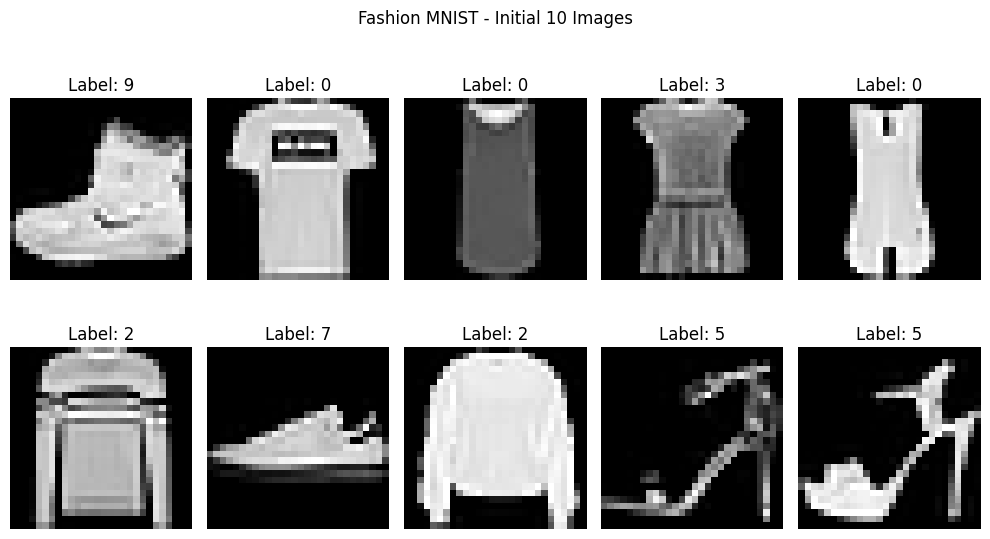

In [11]:
# 2. Data Visualization
plt.figure(figsize=(10,6))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'Label: {y_train[i]}')
  plt.axis('off')
plt.suptitle('Fashion MNIST - Initial 10 Images')
plt.tight_layout()
plt.show()



In [12]:
# 3. Data Normalization and reshaping

x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

In [13]:
# 4. One-hot encoding
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)


In [15]:
# 5. Create Model
model = Sequential()
model.add(Dense(units = 512, input_dim = 784, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))


In [16]:
# 6. Model Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# 7. train the model
history = model.fit(x_train, y_train_categorical, epochs = 20, batch_size = 128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.6790 - loss: 0.9006 - val_accuracy: 0.8477 - val_loss: 0.4198
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8256 - loss: 0.4874 - val_accuracy: 0.8595 - val_loss: 0.3814
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8406 - loss: 0.4388 - val_accuracy: 0.8655 - val_loss: 0.3665
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8495 - loss: 0.4130 - val_accuracy: 0.8657 - val_loss: 0.3552
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8576 - loss: 0.3996 - val_accuracy: 0.8712 - val_loss: 0.3493
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8607 - loss: 0.3820 - val_accuracy: 0.8728 - val_loss: 0.3434
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8648 - loss: 0.3793 - val_accuracy: 0.8750 - val_loss: 0.3396
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8663 - loss: 0.3692 - val

In [ ]:
# 8. Evaluate the MOdel
test_loss, test_acc = model.evaluate(x_test, y_test_categorical)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)

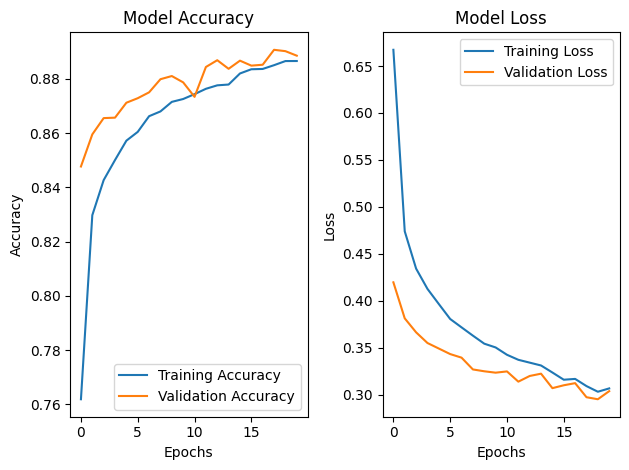

In [18]:
# 9. plot the acc and test
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


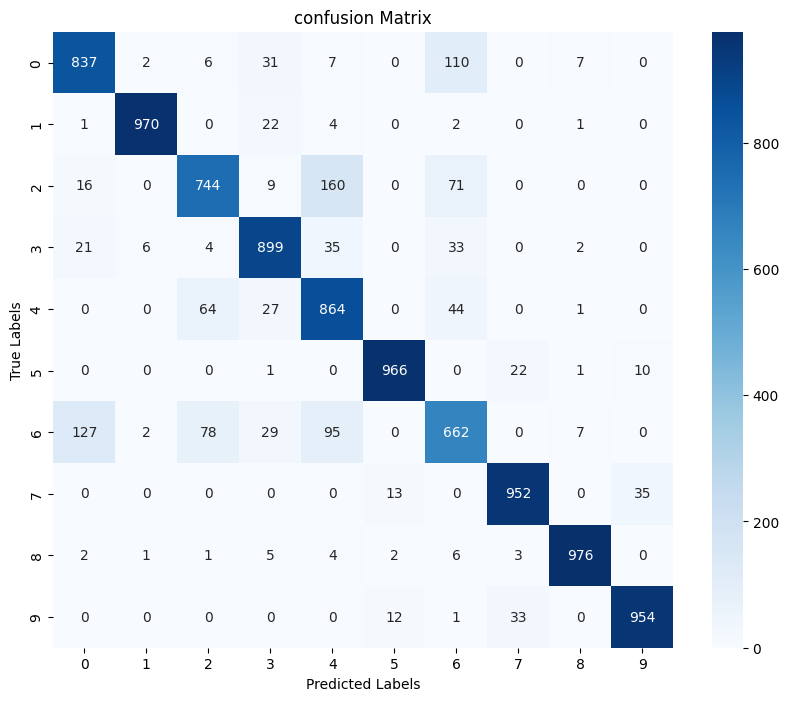

In [19]:
# 10. Confusion Matrix
predicted_labels = np.argmax(model.predict(x_test), axis = 1)
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

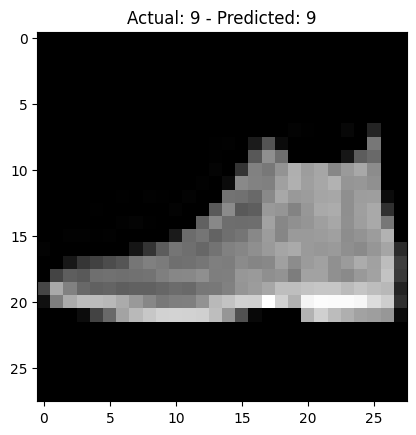

In [20]:
# 11.
def show_prediction(index):
  plt.imshow(x_test[index].reshape(28, 28), cmap = 'gray')
  plt.title(f'Actual: {y_test[index]} - Predicted: {predicted_labels[index]}')
  plt.show()

show_prediction(0)